# Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. 

Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import pandas as pd

In [3]:
rats = pd.read_csv('./rats.txt', delimiter='\t')

In [4]:
rats.head()

,lifespan,diet
0,105,restricted
1,193,restricted
2,211,restricted
3,236,restricted
4,302,restricted


In [5]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan'].values
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan'].values

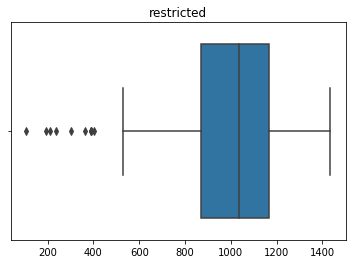

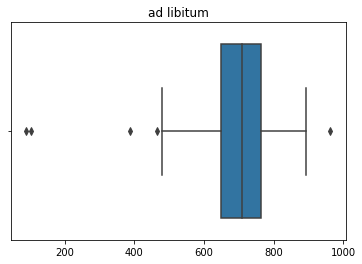

In [6]:
plt.title('restricted')
sns.boxplot(x=x1)
plt.show()
plt.title('ad libitum')
sns.boxplot(x=x2)

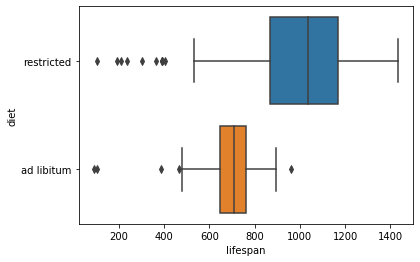

In [7]:
sns.boxplot(x='lifespan', y='diet', data=rats)

Гистограммы распределений

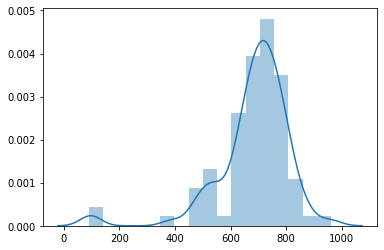

In [11]:
sns.distplot(x2)

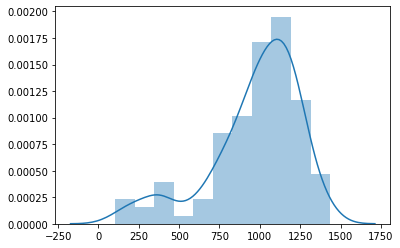

In [10]:
sns.distplot(x1)

# Нормальность
$H_0$: каждая из выборок нормальна

$H_1$: нет

Критерий Шапиро:

In [17]:
st.shapiro(x1)

(0.9036345481872559, 1.1565858812900842e-06)

In [18]:
st.shapiro(x2)

(0.8444006443023682, 3.081509092339729e-08)

Попробуем исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой).

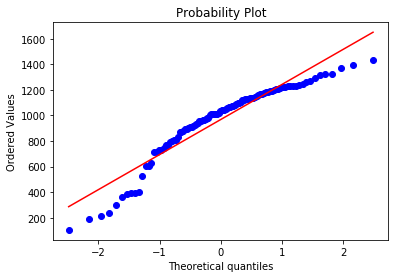

In [13]:
qq_points, qq_line = st.probplot(x1, plot=plt)

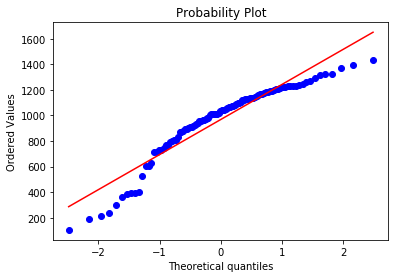

In [16]:
qq_points, qq_line = st.probplot(x1, plot=plt)

q-q

In [19]:
x_1 = x1[x1>=400]
x_2 = x2[x2>=400]

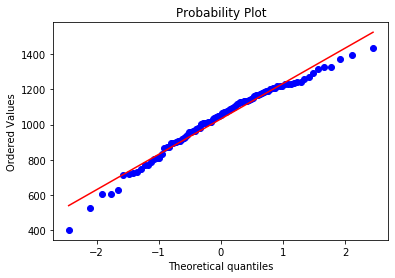

In [22]:
qq_points, qq_line = st.probplot(x_1, plot=plt)

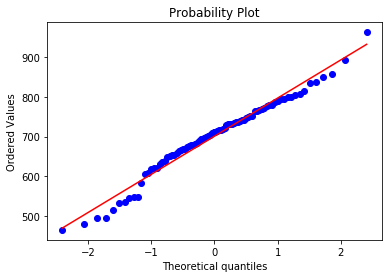

In [28]:
qq_points, qq_line = st.probplot(x_2, plot=plt)

Шапиро:

In [20]:
st.shapiro(x_1)

(0.9738006591796875, 0.04921640083193779)

In [21]:
st.shapiro(x_2)

(0.9765744209289551, 0.11983636021614075)

Ожидаемые p-value:
```0.049,  0.119```

Усечённые выборки можно считать практически нормальными.

# Сравнение средних
$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

$H_1$: крысы на строгой диете живут дольше.



In [23]:
x1c = x_1
x2c = x_2

In [24]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(x1c, x2c, alternative='larger', usevar='unequal')

(14.527701019046814, 3.941182274101304e-30, 141.33154919379604)

In [25]:
ttest_ind(x1c,x2c, alternative='two-sided', usevar='unequal')

(14.527701019046814, 7.882364548202608e-30, 141.33154919379604)

На полных выборках:

In [26]:
ttest_ind(x1,x2, alternative='larger', usevar='unequal')

(9.161061040974156, 1.4580405594293205e-16, 154.9404956691433)

In [27]:
ttest_ind(x1,x2, alternative='two-sided', usevar='unequal')

(9.161061040974156, 2.916081118858641e-16, 154.9404956691433)

**Weindruch R., Walford R.L. The Retardation of Aging and Disease by Dietary Restriction. Springfield: Charles C. Thomas, 1988.**